In [1]:
import yt 

ds = yt.load_sample("IsolatedGalaxy")
reg = ds.region(ds.domain_center, ds.domain_left_edge, ds.domain_right_edge)

yt : [INFO     ] 2024-01-30 13:56:18,801 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2024-01-30 13:56:18,932 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2024-01-30 13:56:18,933 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-01-30 13:56:18,933 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-01-30 13:56:18,934 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-01-30 13:56:18,934 Parameters: cosmological_simulation   = 0


In [13]:
# ag['gas', 'velocity_divergence'] # errors cause it needs ghost zones

In [35]:
level = 5
le = ds.domain_center - ds.quan(0.1, 'code_length')
re = ds.domain_center + ds.quan(0.1, 'code_length')

dims = (4,4,4)
temp_cg = ds.covering_grid(level, le, dims, num_ghost_zones=1)
effective_dds = temp_cg.dds
dims = (re - le) / effective_dds
dims = dims.astype('int').d
print(dims)
cg = ds.covering_grid(level, le, dims, num_ghost_zones=1)

[204 204 204]


In [36]:
cg['gas', 'velocity_divergence'].shape

(204, 204, 204)

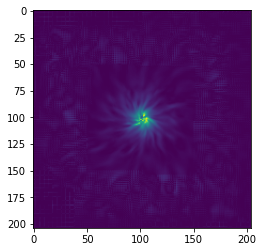

In [39]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.imshow((np.abs(cg['gas', 'velocity_divergence'][:,:,int(100)])))

In [41]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_radial_velocity'),
 (

In [45]:
fld = ds.field_info[('gas', 'velocity_divergence')]

In [47]:
fld.

False